In [1]:
#uses New_environment220920 #now broken so use 3Dtrackplot

import mpl_toolkits
from mpl_toolkits import mplot3d
# %matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math as mt
import datetime
from datetime import datetime, timedelta, time

import statistics
import seaborn as sns
import os

In [6]:
#ANALYZING DP AND SP 
# if movies are in lots of different folders
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('DP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataDP=pd.concat(file_list, axis =0, ignore_index=True)
dataDP['Hoxb5_status']='DP'
print(dataDP)

file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('SP.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

dataSP=pd.concat(file_list, axis =0, ignore_index=True)
dataSP['Hoxb5_status']='SP'

   ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0            5            1                 NaN                    NaN   
1            5            2                 NaN                    NaN   
2            1            1                 NaN                    NaN   
3            1            2                 NaN                    NaN   
4            1            3                 NaN                    NaN   
5            1            4                 NaN                    NaN   
6            1            5                 NaN                    NaN   
7            1            6                 NaN                    NaN   
8            1            7                 NaN                    NaN   
9            1            8                 NaN                    NaN   
10           1            9                 NaN                    NaN   
11           1           10                 NaN                    NaN   
12           1           11           

In [7]:
data=pd.concat([dataSP, dataDP], axis=0, ignore_index=True)
print(data)

    ImageNumber ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0             5            1                 NaN                    NaN   
1             5            2                 NaN                    NaN   
2             5            3                 NaN                    NaN   
3             5            4                 NaN                    NaN   
4             5            5                 NaN                    NaN   
..          ...          ...                 ...                    ...   
469           1           16                 NaN                    NaN   
470           2            1                 NaN                    NaN   
471           2            2                 NaN                    NaN   
472           2            3                 NaN                    NaN   
473           1            1                 NaN                    NaN   

    Metadata_Format Metadata_Frame Metadata_Series  \
0               NaN              0           

In [8]:
#importing the metadata
# metadata=pd.read_csv('/Users/secchim/Documents/221103merged_metadata_and_mice.csv')
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')

# metadata['Metadata_VWF']=(metadata['Original_Filename']).str.replace('.czi','')
# # data['Metadata_VWF']=(data['Metadata_VWF']).str.replace('_0','')
# data=pd.merge(data, metadata[:], on = 'Metadata_VWF')
# print(data)

data['FileID']=data['Metadata_VWF'].str[0:19]
print(data['FileID'])
# data=pd.merge(data, metadata[:], on = 'FileID')


0      VWF_062_MS220421_M5
1      VWF_062_MS220421_M5
2      VWF_062_MS220421_M5
3      VWF_062_MS220421_M5
4      VWF_062_MS220421_M5
              ...         
469    VWF_043_MS211118_m1
470    VWF_043_MS211125_m3
471    VWF_043_MS211125_m3
472    VWF_043_MS211125_m3
473    VWF_082_MS230327_M1
Name: FileID, Length: 474, dtype: object


In [9]:
#data.to_csv('/Users/secchim/Documents/230113TEST.csv')
# data.to_csv('/Users/secchim/Documents/230602TEST.csv') #includes up to VWF_062
data.to_csv('/Users/secchim/Documents/230719TEST.csv')#includes up to VWF_095

/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMK'>

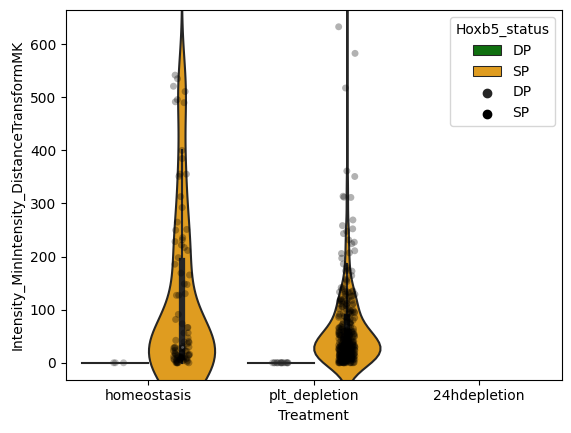

In [14]:
# sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, dodge=True, color='black', alpha=0.3)

sns.violinplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, showfliers = False, palette=['green','orange'], hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24hdepletion','old_homeostasis'))
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMK", data=data, dodge=True, color='black', alpha=0.3, hue_order=('DP','SP'), order=('homeostasis','plt_depletion','24hdepletion','old_homeostasis'))


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformMKprog'>

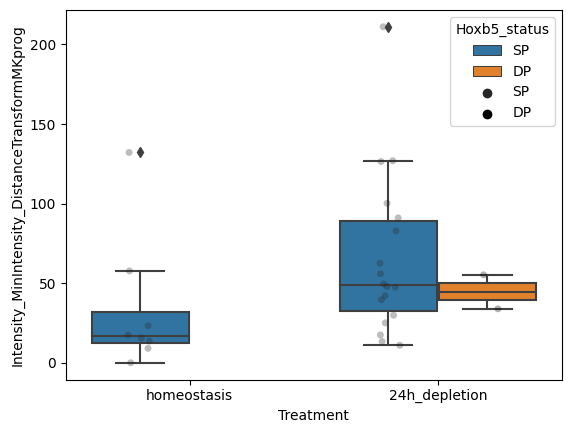

In [8]:
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data, order=['homeostasis', '24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformMKprog", data=data, dodge=True, color='black', alpha=0.3, order=['homeostasis', '24h_depletion'])


/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data


<AxesSubplot: xlabel='Treatment', ylabel='Intensity_MinIntensity_DistanceTransformvessel'>

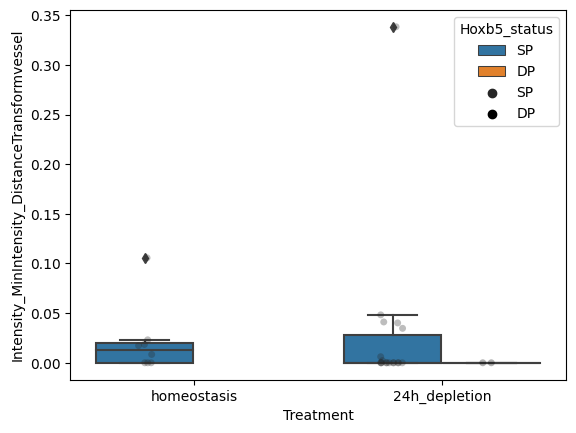

In [9]:
sns.boxplot(x=("Treatment"), hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data,  order=['homeostasis', '24h_depletion'])
sns.stripplot(x=("Treatment"),hue='Hoxb5_status', y="Intensity_MinIntensity_DistanceTransformvessel", data=data, dodge=True, color='black', alpha=0.3,  order=['homeostasis', '24h_depletion'])


In [82]:
#Analyze BM volume 
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Ilastik.csv'):
            # file_list.append(os.path.join(root,file))
            dataIlastik=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataIlastik)

dataIlastik=pd.concat(file_list, axis =0, ignore_index=True)
print(dataIlastik)

       ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                5             1                 NaN                    NaN   
1                5             2                 NaN                    NaN   
2                5             3                 NaN                    NaN   
3                5             4                 NaN                    NaN   
4                5             5                 NaN                    NaN   
...            ...           ...                 ...                    ...   
72131            8           738                 NaN                    NaN   
72132            8           739                 NaN                    NaN   
72133            8           740                 NaN                    NaN   
72134            8           741                 NaN                    NaN   
72135            8           742                 NaN                    NaN   

      Metadata_Format  Metadata_Frame  Metadata_Ser

In [83]:
#Calculate total BM volume per tilescan
grouped=dataIlastik.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['BM_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataIlastik=pd.concat(dflist)
print(dataIlastik['BM_volume']) 

5570     8.370971e+07
5571     8.370971e+07
5572     8.370971e+07
5573     8.370971e+07
5574     8.370971e+07
             ...     
70647    1.333011e+04
70648    1.333011e+04
70649    1.333011e+04
70650    1.333011e+04
70651    1.333011e+04
Name: BM_volume, Length: 72136, dtype: float64


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/3993930723.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2388133583.py:16: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


2790      1.205062e+07
2791      1.205062e+07
2792      1.205062e+07
2793      1.205062e+07
2794      1.205062e+07
              ...     
184489    8.887348e+06
184490    8.887348e+06
184491    8.887348e+06
184492    8.887348e+06
184493    8.887348e+06
Name: vessel_volume, Length: 185170, dtype: float64


[Text(0, 0.5, 'vessel volume (µm3)')]

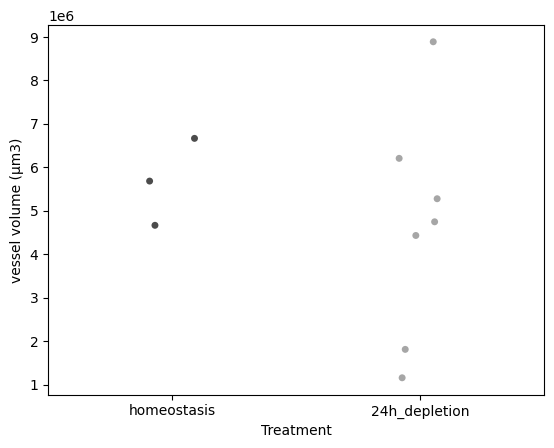

In [87]:
#Calculate vessel volume 
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('AF647.csv'):
            # file_list.append(os.path.join(root,file))
            dataAF647=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(dataAF647)

dataAF647=pd.concat(file_list, axis =0, ignore_index=True)
# print(dataAF647)

grouped=dataAF647.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['vessel_volume']=(newdf['AreaShape_Volume'].sum())/(0.829*0.829*3)
    dflist.append(newdf)
dataAF647=pd.concat(dflist)
print(dataAF647['vessel_volume']) 

#importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
dataAF647['FileID']=dataAF647['Metadata_VWF'].str[0:19]
# print(dataAF647['FileID'])

dataAF647=pd.merge(dataAF647, metadata[:], on = 'FileID')
dataAF647=dataAF647[dataAF647['Treatment']!='old_homeostasis']
dataAF647=dataAF647[dataAF647['Treatment']!='plt_depletion']
dataAF647=dataAF647[['Metadata_VWF','vessel_volume','Treatment']].drop_duplicates()

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="vessel_volume", data=dataAF647, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='vessel volume (µm3)')

In [89]:
#Merge dataIlastik and dataAF647
dataI=dataIlastik[['BM_volume','Metadata_VWF']]
dataI=dataI.drop_duplicates()
dataV=dataAF647[['vessel_volume','Metadata_VWF','Treatment']]
dataV=dataV.drop_duplicates()
dataBM=pd.merge(dataI, dataV[:], on = 'Metadata_VWF')
# print(dataBM)

#Subtract vessel volume to BM volume
for i in dataBM.index:
    dataBM.loc[i,'BM_vessel']=dataBM.loc[i,'BM_volume']-dataBM.loc[i,'vessel_volume']
#calculate cell number (cell volume of a diameter of 10um = 523.6, 11um =726)
    dataBM.loc[i,'Cellularity']=dataBM.loc[i,'BM_vessel']/736.9

print(dataBM)

#Haematopoietic stem cells in perisinusoidal niches are protected from ageing 
#https://www.nature.com/articles/s41556-019-0418-y#Fig1
#this paper estimates 1357 cells in 1 000 000 = 736.9 for 1 cells

###Plot normalized vessel volume

grouped=dataBM.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['norm_vol']=(newdf['vessel_volume']/newdf['BM_volume'])
    dflist.append(newdf)
dataAF647=pd.concat(dflist)
print(dataAF647['norm_vol']) 

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="norm_vol", data=dataAF647, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='normalized vessel volume (µm3)')
### some tilescans have greater vessel volume than BM volume which is incorrect
print(dataAF647)

      BM_volume                                       Metadata_VWF  \
0  4.391972e+07  VWF_053_MS220208_M3_homeostasis_tilescanpadded...   
1  4.070559e+07        VWF_060_MS220408_M2_tilescanpadded-stitched   
2  1.023717e+07       VWF_062_MS220421_M5_TILESCANpadding-stitched   
3  2.526188e+04        VWF_091_MS230402_M1_Tilescan-Stitching-01_0   
4  3.470544e+04        VWF_091_MS230402_M2_Tilescan-Stitching-02_0   
5  9.450833e+03  VWF_093_MS230406_M2_tilescan_24hdep-Stitching-...   
6  1.477260e+04  VWF_093_MS230406_M3_tilescan_24hdep-Stitching-...   
7  2.116676e+04        VWF_095_MS230420_M5_tilescan-Stitching-02_0   
8  2.591958e+04        VWF_095_MS230420_M6_tilescan-Stitching-03_0   
9  1.333011e+04        VWF_095_MS230420_M7_tilescan-Stitching-01_0   

   vessel_volume      Treatment     BM_vessel   Cellularity    norm_vol  
0   6.664774e+06    homeostasis  3.725494e+07  50556.306289    0.151749  
1   5.275700e+06  24h_depletion  3.542989e+07  48079.639125    0.129606  
2   1.8

0    0.000158
1    0.000187
2    0.000612
3    0.000052
4    0.000050
Name: SP_freq, dtype: float64 0    0.000000
1    0.000000
2    0.000175
3    0.000000
4    0.000000
Name: DP_freq, dtype: float64 0    0.000158
1    0.000187
2    0.000787
3    0.000052
4    0.000050
Name: Kuo_freq, dtype: float64 0    VWF_053_MS220208_M3_homeostasis_tilescanpadded...
1          VWF_060_MS220408_M2_tilescanpadded-stitched
2         VWF_062_MS220421_M5_TILESCANpadding-stitched
3          VWF_063_MS220428_m1_tilescanpadded-stitched
4          VWF_063_MS220428_m2_tilescanpadded-stitched
Name: Metadata_VWF, dtype: object


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_68249/3366608021.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


<AxesSubplot: ylabel='Cellularity'>

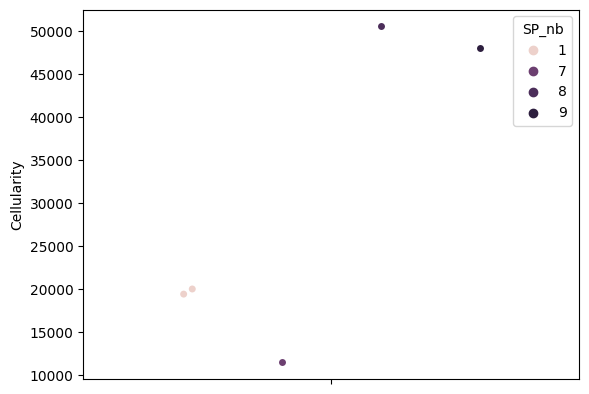

In [24]:
#Calculate the frequency of KuO per tilescan

# print(data['Hoxb5_status'])
grouped=data.groupby(['Metadata_VWF'])
dflist=[]
for i, newdf in grouped:
    newdf['SP_nb']=newdf[newdf['Hoxb5_status']=='SP'].shape[0]
    newdf['DP_nb']=newdf[newdf['Hoxb5_status']=='DP'].shape[0]
    dflist.append(newdf)
data=pd.concat(dflist)
# print(data['SP_nb'], data['DP_nb']) 

dataF=data[['Metadata_VWF', 'SP_nb','DP_nb']]
dataF=dataF.drop_duplicates()
dataF=pd.merge(dataF, dataBM[:], on = 'Metadata_VWF')

for i in dataF.index:
    dataF.loc[i, 'SP_freq']=dataF.loc[i,'SP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'DP_freq']=dataF.loc[i, 'DP_nb']/dataF.loc[i,'Cellularity']
    dataF.loc[i,'Kuo_freq']=(dataF.loc[i,'SP_nb']+dataF.loc[i,'DP_nb'])/dataF.loc[i,'Cellularity']
print(dataF['SP_freq'], dataF['DP_freq'], dataF['Kuo_freq'], dataF['Metadata_VWF'])

#PB VWF_063_m2_tilescanpadded2 has no SP
#Kuo freqfreq between 0.00005 and 0.0007 => between 0.005% and 0.07% Sacma is between 0.01 and 0.07%
#by FACS SP freq is between 0.04%and 0.01%
#by FACS DP freq is about 0.00001 => 0.00001 x Cellularity would be expected number of DP => under 1 in some tilescans

sns.stripplot( y="Cellularity", hue = 'SP_nb', data=dataF, dodge=True)

In [16]:
dataF.to_csv('/Users/secchim/Documents/221130TEST.csv')

       ImageNumber  ObjectNumber  Metadata_Channelnb  Metadata_FileLocation  \
0                5             1                 NaN                    NaN   
1                5             2                 NaN                    NaN   
2                5             3                 NaN                    NaN   
3                5             4                 NaN                    NaN   
4                5             5                 NaN                    NaN   
...            ...           ...                 ...                    ...   
13698            8           233                 NaN                    NaN   
13699            8           234                 NaN                    NaN   
13700            8           235                 NaN                    NaN   
13701            8           236                 NaN                    NaN   
13702            8           237                 NaN                    NaN   

      Metadata_Format  Metadata_Frame  Metadata_Ser

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2535473364.py:24: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


6106      6740
4294      1812
0         4294
12846    16354
29200     6369
35569     5825
41394    19224
41421    19224
60618      312
60930     4484
65414    12246
77660     2317
79977     3570
83547    31824
Name: MK_count, dtype: int64


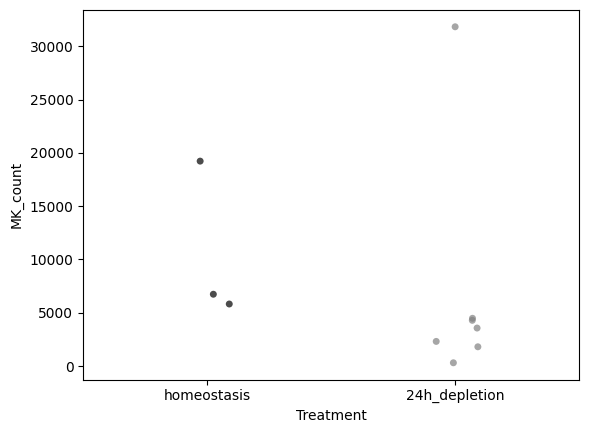

In [61]:
# MKs from CP tilescan 
file_list=[]
folderpath='/Users/secchim/Downloads/CellProfiler/TilescanKuO/test_cp_output/output_tilescansv2'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('MK.csv'):
            # file_list.append(os.path.join(root,file))
            data=pd.read_csv(os.path.join(root,file), index_col=None, header=0)
            file_list.append(data)

data=pd.concat(file_list, axis =0, ignore_index=True)

print(data)

#importing the metadata
metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
data['FileID']=data['Metadata_VWF'].str[0:19]
print(data['FileID'])

data=pd.merge(data, metadata[:], on = 'FileID')

grouped=data.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['FileID','MK_count','Treatment']].drop_duplicates()
print(datab['MK_count'])
datab=datab[datab['Treatment']!='old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_count", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
# g[1].set(ylabel='MK count')

In [ ]:
###calculating and plotting MK counts

grouped=data.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['FileID','MK_count','Treatment']].drop_duplicates()
print(datab['MK_count'])
datab=datab[datab['Treatment']!='old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_count", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
# g[1].set(ylabel='MK count')

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/3492815861.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


6106      12316.0
6126      12932.0
6146      41592.0
6166       6972.0
6186      26936.0
           ...   
115275     5576.0
115287     2598.0
115299     3304.0
115335     2744.0
115347     8160.0
Name: vol_um, Length: 6935, dtype: float64


[Text(0, 0.5, 'MK volume um3')]

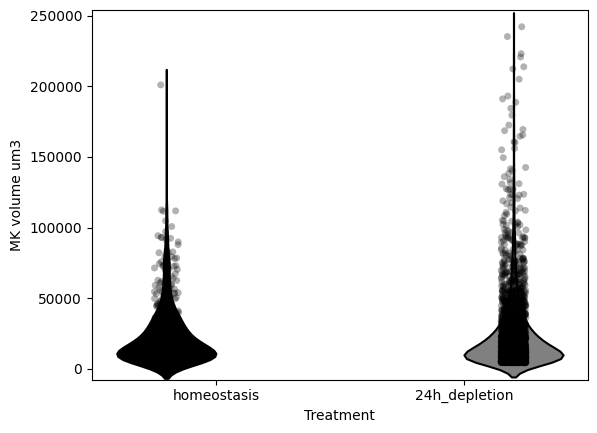

In [72]:
###calculating and plotting MK volume

grouped=data.groupby(['FileID'])
dflist=[]
for i, newdf in grouped:
    # newdf['mean_vol']=newdf['AreaShape_Volume'].mean()
    for b,row in newdf.iterrows():
        # newdf.loc[b,'vol_um']=newdf.loc[b,'AreaShape_Volume']*newdf.loc[b,'Scale_X']*newdf.loc[b,'Scale_Y']*newdf.loc[b,'Scale_Z']*1000000
        newdf.loc[b,'vol_um']=newdf.loc[b,'AreaShape_Volume']#*1000000
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['FileID','vol_um','Treatment']].drop_duplicates()
print(datab['vol_um'])
# datab=data[['FileID','AreaShape_Volume','Treatment']]
datab=datab[datab['vol_um']<250000]
datab=datab[datab['vol_um']>4188]
datab=datab[datab['Treatment']!='old_homeostasis']
datab=datab[datab['Treatment']!='plt_depletion']

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
g=(sns.violinplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, showfliers = False, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'), legend=False), sns.stripplot(x=("Treatment"), hue='Treatment', y="vol_um", data=datab, alpha=0.3, dodge=True, palette=['black','black'], hue_order=('homeostasis','24h_depletion')))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g[1].set(ylabel='MK volume um3')

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="AreaShape_Volume", dodge=True, data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='MK volume')

In [44]:
###### CHECKING MISSING MOVIES because the second CP pipeline failed
# import os

correct_file=[]
missing_file=[]

filepath='/Users/secchim/Downloads/movie_output'

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:        
        if file.endswith("Experiment.csv"):
            nfile=os.path.join(root,file)
            nfile=nfile[38:-22]
            if nfile not in correct_file:
                # print(nfile)
                correct_file.append(nfile)

for root, dirs, files in os.walk(filepath): # will open up all the folders, dirs is all the name of the folder it finds, files will contain all the filenames it finds
    for file in files:
            if file.endswith(".tiff"):
                xfile=os.path.join(root,file)
                xfile=xfile[38:-(len(file)+1)]
                if xfile not in missing_file and xfile not in correct_file:
                    # print(xfile)
                    missing_file.append(xfile)


# print('correct_file', correct_file)
print('file_missing from downstream folders', missing_file)


file_missing from downstream folders ['VWF_048_MS220120_M2_movie20_depletion_P14', 'VWF_048_MS220120_M2_movie19_depletion_P14', 'VWF_049_MS220201_M1_Snap_movie10depletion_P12DP', 'VWF_049_MS220201_M1_Snap_movie6depletion_P152kuo', 'VWF_066_MS220519_M2_movie1k_P9DP', 'VWF_045_MS211208_M2_movie7_P25', 'VWF_063_MS220428_m1_movie3_P9dimdp', 'VWF_045_MS211208_M2_movie8_P27', 'VWF_066_MS220519_M2_movie1k_P12_2k_mk', 'VWF_045_MS211208_M2_movie8_P26', 'VWF_049_MS220201_M1_Snap_movie7depletion_P9kuo2', 'VWF_043_MS211126_m4-pltdepletionmovie2_P12+', 'VWF_066_MS220519_M2_movie1k_P14k', 'VWF_048_MS220120_M2_movie19_depletion_P11', 'VWF_048_MS220120_M2_movie20_depletion_P11', 'VWF_060_MS220408_M1_MOVIE2_P10', 'VWF_060_MS220408_M1_MOVIE2_P8', 'VWF_060_MS220408_M1_MOVIE1_P4GREENVESSEL', 'VWF_060_MS220408_M1_MOVIE5_P17', 'VWF_045_MS211208_M2_movie7_P27', 'VWF_060_MS220408_M2_movie_test2_P9', 'VWF_048_MS220120_M2_movie16_depletion_P7', 'VWF_048_MS220120_M2_movie16_depletion_P9', 'VWF_060_MS220408_M1_MO

<AxesSubplot: xlabel='distance_to_vessel', ylabel='Count'>

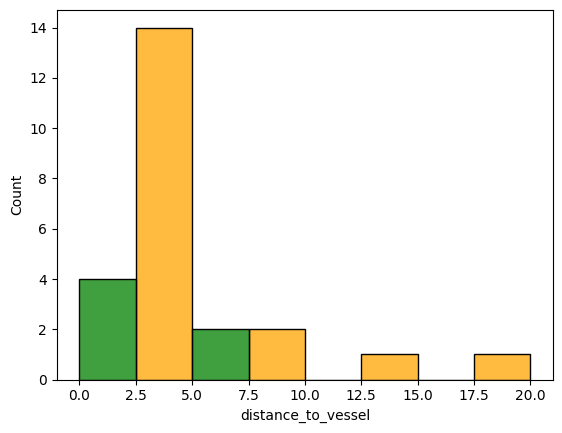

In [4]:
data=pd.read_csv('/Users/secchim/Documents/Experiments/Imaris_aged_IVM_tilescans/distance_to_MK_v1.csv', index_col=None, header=0)
# data=data[data['Treatment']=='homeostasis']
data=data[data['Treatment']=='24h_depletion']
data=data[data['file_type']=='tilescan']
# sns.histplot(data, x="distance_to_MK", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge")

for r,b, in data.iterrows():
    data.loc[r,'distance_to_vessel']=data.loc[r,'distance_to_vessel']-4
    if data.loc[r,'distance_to_vessel']<0:
        data.loc[r,'distance_to_vessel']=0

sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")


/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3397/2413145611.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_3397/2413145611.py:26: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


{'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_0': 52.59916730329479, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_1': 52.59916730329479, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_2': 182.26756889257638, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_3': 109.16866777679398, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_4': 109.16866777679398, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_5': 131.90546323882882, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_6': 142.70261794501178, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_7': 116.70190692636514, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_8': 150.71580047231285, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_9': 146.9558814645433, 'VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01_hoxb5_v2_Statistics_10': 146.95588

<AxesSubplot: xlabel='min_distance_to_kuo', ylabel='Count'>

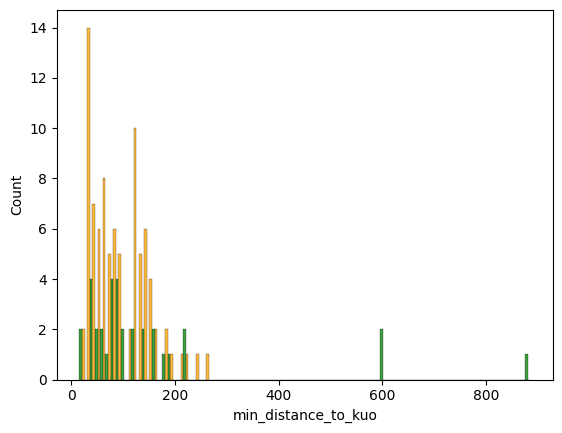

In [9]:
#attempt to calculate distances between KuO
data=pd.read_csv('/Users/secchim/Documents/Experiments/Imaris_aged_IVM_tilescans/distance_to_MK_v1.csv', index_col=None, header=0)

# data=data[data['Treatment']=='homeostasis']
data=data[data['Treatment']=='ageing']
data=data[data['file_type']=='tilescan']
data['Final_Cell_ID']=data['file']+'_'+data['ID'].astype(str)
# datax=data[data['track_length']!=0]
# datax=datax[datax['Treatment']!='ageing']
# datax=datax[datax['Treatment']!='depletion']
# datax=datax[datax['Treatment']!='24hdepletion']
# datax=datax[datax['Treatment']!='homeostasis']
# datax=datax[datax['Metadata_Timepoint']!='1']
datab=data[['Final_Cell_ID', 'file','Treatment', 'Hoxb5_status_corrected', 'x', 'y','z']]
datab['Group']=datab['Treatment']+'_'+datab['Hoxb5_status_corrected']

dict={}
dict=dict.fromkeys(datab['Final_Cell_ID'].unique())
# print(dict, type(dict))


df_list=[]
# datab['min_distance_to_kuo']=10000000
grouped=datab.groupby(['file'])
dflist=[]
for i, newdf in grouped:
    if len(newdf['Final_Cell_ID'].unique())>1:
        for a in newdf['Final_Cell_ID'].unique():
            for b in newdf['Final_Cell_ID'].unique():
                if a!=b:
                    a_coordinates=newdf[newdf['Final_Cell_ID']==a]
                    b_coordinates=newdf[newdf['Final_Cell_ID']==b]
                    min_distance_to_kuo=mt.sqrt((a_coordinates.iloc[0,4]-b_coordinates.iloc[0,4])**2+(a_coordinates.iloc[0,5]-b_coordinates.iloc[0,5])**2+(a_coordinates.iloc[0,6]-b_coordinates.iloc[0,6])**2)
                    # print(dict[a])
                    if dict[a]==None: 
                        dict[a]=min_distance_to_kuo
                    elif dict[a]>min_distance_to_kuo:
                        dict[a]=min_distance_to_kuo
                    
                    # if newdf.iloc[1,'min_distance_to_kuo']>min_distance_to_kuo:
                        # newdf['min_distance_to_kuo']=min_distance_to_kuo
                    # dflist.append(newdf)
# datab=pd.concat(dflist)    
# print(datab['min_distance to kuo'])
print(dict)
addup=pd.DataFrame.from_dict(dict, orient='index', columns=['min_distance_to_kuo'])
addup['Final_Cell_ID']=addup.index
# for i,r in datab.iterrows():
#     if datab.iloc[i,'Final_Cell_ID'] in dict.keys():
#         datab.iloc[i,'min_distance_to_kuo']=dict[(datab.iloc[i,'Final_Cell_ID'])].values()
# print(datab['min_distance_to_kuo'])

# print(addup[:])


data=pd.merge(datab, addup[:], on = 'Final_Cell_ID')
print(data['min_distance_to_kuo'])
data=data[[ 'Final_Cell_ID','Treatment', 'Hoxb5_status_corrected', 'min_distance_to_kuo','Group']]
data=data.drop_duplicates()
# data.to_csv('/Users/secchim/Downloads/min_kuo_distances.csv', index=False)

##plotting one cell type and condition at a time 
# sns.scatterplot(x='FileID',y="min_distance_to_kuo", style='Treatment', hue='Hoxb5_status_corrected', data=data, legend=False)
# data=data[data['Treatment']=='ageing']
# sns.displot(data, x="min_distance_to_kuo", hue="Hoxb5_status_corrected", kind="kde", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'))
# data=data[data['Hoxb5_status_corrected']=='hoxb5']
#histplot best to represent this data
sns.histplot(data, x="min_distance_to_kuo", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge")

##these first few lines not good
# g=(sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion'), split=True, legend=False), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','depletion','24hdepletion'), legend=False))
# g=(sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, showfliers = False, palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','ageing'), split=True, legend=False), sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, color='black', alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'), order=('homeostasis','ageing'), legend=False))
# plt.legend(title='Mininum distance to other KuO+', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend([], [], frameon=False)
# g[1].set(ylabel='Minimum distance to other KuO+ cells (µm)')
# plt.ylim(0,500)
# plt.show(g)
##this one works fine, plotting all conditions and cell groups at once
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','depletion','24hdepletion'), legend=False)
# sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="min_distance_to_kuo", data=data, dodge=True, alpha=0.5, s=10, hue_order=('Hoxb5_vwf','hoxb5'),  palette=['green','orange'], order=('homeostasis','ageing'), legend=False)


##STATS
# data=data[data['Treatment']!='depletion']###When excluding na, compare only homeostasis and 24hdepletion
# model = ols('min_distance_to_kuo ~  C(Hoxb5_status_corrected) + C(Treatment)', data=data).fit()
# sm.stats.anova_lm(model, typ=2)
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Treatment'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Hoxb5_status_corrected'], alpha=0.05).summary()
# sm.stats.multicomp.pairwise_tukeyhsd(data['min_distance_to_kuo'], data['Group'], alpha=0.05).summary()

/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/opt/anaconda3/envs/New_environment220920/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newva

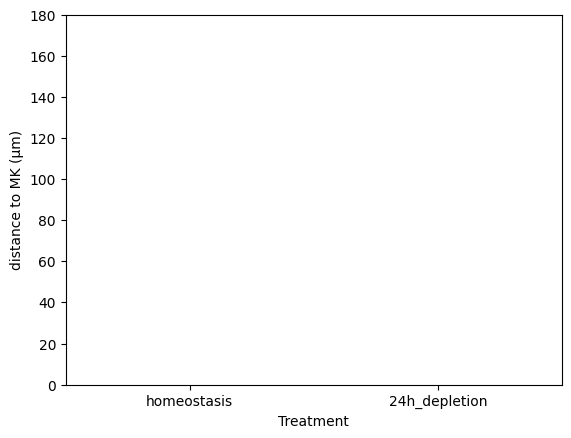

<AxesSubplot: xlabel='distance_to_MK', ylabel='Count'>

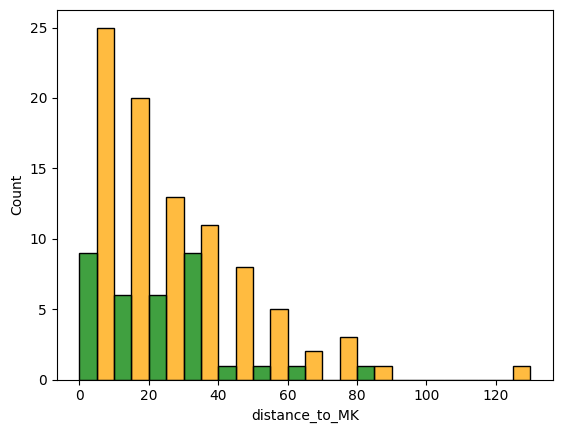

In [8]:
data=pd.read_csv('/Users/secchim/Documents/Experiments/Imaris_aged_IVM_tilescans/distance_to_MK_v1.csv', index_col=None, header=0)
# data=data[data['Treatment']=='homeostasis']
# data=data[data['Treatment']!='homeostasis']
# data=data[data['Treatment']!='24h_depletion']
# data=data[data['Treatment']!='ageing']
data=data[data['Treatment']=='ageing']
# data=data[data['file_type']=='movie']
data=data[data['file_type']=='tilescan']
data=data[data['Time']==1]

# for r,b, in data.iterrows():
#     data.loc[r,'distance_to_vessel']=data.loc[r,'distance_to_vessel']-4
#     if data.loc[r,'distance_to_vessel']<0:
#         data.loc[r,'distance_to_vessel']=0

# # sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")
# # sns.histplot(data, x="distance_to_vessel", hue="Treatment", palette=['green','black'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge")
# g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance_to_vessel", data=data, dodge=True, color='black', alpha=0.3,  order=('homeostasis','24h_depletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="distance_to_vessel", data=data, showfliers = False, palette=['green','orange'],  order=('homeostasis','24h_depletion')))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g[1].set(ylabel='distance to vessel (µm)')
# g[1].set(ylim=(0,20))
# plt.show(g)

for r,b, in data.iterrows():
    data.loc[r,'distance_to_MK']=data.loc[r,'distance_to_MK']-4
    if data.loc[r,'distance_to_MK']<0:
        data.loc[r,'distance_to_MK']=0

# sns.histplot(data, x="distance_to_vessel", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=5, multiple="dodge")
# sns.histplot(data, x="distance_to_vessel", hue="Treatment", palette=['green','black'], hue_order=('homeostasis','24h_depletion'), legend=False, binwidth=5, multiple="dodge")
g=(sns.stripplot(x=("Treatment"),hue='Hoxb5_status_corrected', y="distance_to_MK", data=data, dodge=True, color='black', alpha=0.3,  order=('homeostasis','24h_depletion')), sns.violinplot(x=("Treatment"), hue='Hoxb5_status_corrected', y="distance_to_MK", data=data, showfliers = False, palette=['green','orange'],  order=('homeostasis','24h_depletion')))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g[1].set(ylabel='distance to MK (µm)')
g[1].set(ylim=(0,180))
plt.show(g)

sns.histplot(data, x="distance_to_MK", hue="Hoxb5_status_corrected", palette=['green','orange'], hue_order=('Hoxb5_vwf','hoxb5'), legend=False, binwidth=10, multiple="dodge")


                                                File_ID       MK_norm  \
744   VWF_043_MS211125_m3-tilescanpaddedstiched_Stat...  1.547529e-05   
1681  VWF_062_MS220421_M5_TILESCAN_2padded-stitchedM...  1.658060e-05   
1612  VWF_063_MS220428_m1_tilescanpadded-stitchedMK_...  9.065778e-06   
1327  VWF_078_MS230122_M5_tilescan_Day0-Stitching-02...  2.232834e-07   
1472  VWF_078_MS230122_M6_tilescan_Day0-Stitching-03...  3.072938e-07   
354   VWF_082_MS230328_M1_Tilescan_Day1-Stitching-04...  1.861732e-05   
555   VWF_082_MS230328_M3_Tilescan_Day1-Stitching-01...  1.700282e-05   
0     VWF_091_MS230402_M1_Tilescan-Stitching-01_Stat...  1.655754e-05   
163   VWF_102_MS230520_M1_homeostasis_tilescan-Stitc...  1.654797e-05   
974   VWF_102_MS230520_M3_24hdep_tilescan-Stitching-...  2.868689e-05   
1225  VWF_109_MS230619_M1_tilescan-Stitching-05_Stat...  1.846301e-05   

          Treatment  
744     homeostasis  
1681  24h_depletion  
1612  24h_depletion  
1327    homeostasis  
1472    homeo

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2412106133.py:25: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:


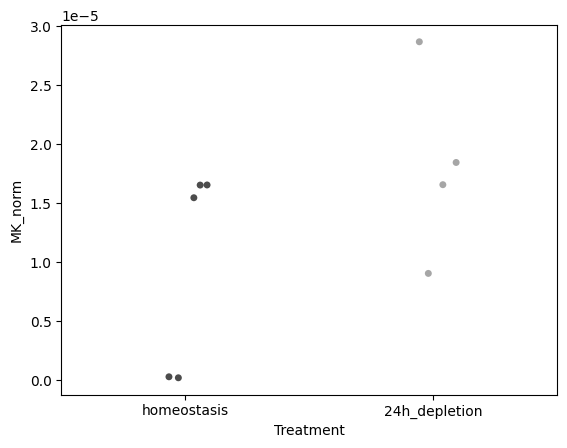

In [33]:
###IMARIS MK MEASUREMENTS

data=pd.read_csv('/Users/secchim/Documents/Experiments/distance analysis/MK_measurements.csv', index_col=None, header=0)
# data=data[data['Treatment']=='homeostasis']

# for r,b, in data.iterrows():
#     if data.loc[r,'Volume']>100000:
#         data.loc[r,'Volume']=None

# # sns.histplot(data, x="Volume", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=1000, multiple="dodge")

# sns.histplot(data, x="Sphericity", hue="Treatment", palette=['blue','red'], hue_order=('homeostasis','ageing'), legend=False, binwidth=0.1, multiple="dodge")

# # g=(sns.stripplot(x=("Treatment"),hue='File_ID', y="Volume", data=data, alpha=0.3), sns.violinplot(x=("Treatment"), hue='File_ID', y="Volume", data=data, showfliers = False, palette=['green','orange']))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# # plt.legend([], [], frameon=False)
# # g[1].set(ylabel='MK volume (µm3)')
# # g[1].set(ylim=(0,150000))
# # plt.show(g)


# ###MK count
grouped=data.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['MK_count']=newdf.shape[0]
    newdf['total_vol']=newdf['Volume Outside'].max()
    newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']
    dflist.append(newdf)
datab=pd.concat(dflist)
# datab=datab[['File_ID','MK_count','Treatment']].drop_duplicates()
datab=datab[['File_ID','MK_norm','Treatment']].drop_duplicates()
print(datab)
# print(datab['MK_count'])
datab=datab[datab['Treatment']!='ageing']

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="MK_norm", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
# g[1].set(ylabel='MK count')

###MK volume

# datab=data[['File_ID','Volume','Treatment']]
# datab=datab[datab['Treatment']!='ageing']
# datab=datab[datab['Volume']>33510]
# datab=datab[datab['Volume']<268083]

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="Volume", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='MK volume (µm3)')

###MK mean volume

# grouped=data.groupby(['File_ID'])
# dflist=[]
# for i, newdf in grouped:
#     newdf['mean_vol']=newdf['Volume'].mean()
#     dflist.append(newdf)
# datab=pd.concat(dflist)
# datab=datab[['File_ID','mean_vol','Treatment']].drop_duplicates()
# print(datab['mean_vol'])
# datab=datab[datab['Treatment']!='ageing']

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="mean_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='MK mean volume (µm3)')

0       VWF_082_MS230328_M1_Tilescan_Day1_
1              VWF_082_MS230328_M1_zstack_
2              VWF_082_MS230328_M1_zstack_
3              VWF_082_MS230328_M1_zstack_
4              VWF_082_MS230328_M1_zstack_
                       ...                
1557            VWF_078_MS230123_M6_movie_
1558            VWF_078_MS230123_M6_movie_
1559            VWF_078_MS230123_M6_movie_
1560            VWF_078_MS230123_M6_movie_
1561            VWF_078_MS230123_M6_movie_
Name: File_ID, Length: 1562, dtype: object
                                              File_ID  norm_vol      Treatment
0          VWF_043_MS211125_m3-tilescanpaddedstiched_  0.240156    homeostasis
1   VWF_053_MS220208_M3_homeostasis_tilescanpadded...  0.240156    homeostasis
2        VWF_060_MS220408_M2_tilescanpadded-stitched_  0.318486  24h_depletion
3        VWF_063_MS220428_m1_tilescanpadded-stitched_  0.432597  24h_depletion
4          VWF_091_MS230402_M1_Tilescan-Stitching-01_  1.719340    homeostasis
5   VWF_10

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2673849118.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2673849118.py:28: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2673849118.py:60: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, newdf in grouped:
/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_95353/2673849118.py:69: Futu

[Text(0, 0.5, 'normalized vessel volume (µm3)')]

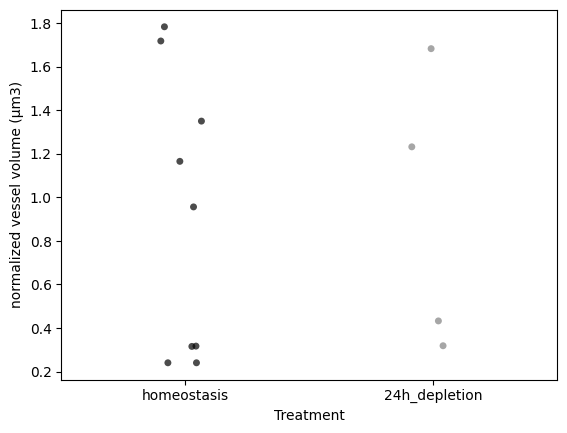

In [79]:
###vessel properties

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/vessel'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('Volume.csv'):
            data=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            data['File_ID']=file.replace('vessel_Volume.csv','_')
            file_list.append(data)

data=pd.concat(file_list, axis =0, ignore_index=True)
# print(data)
# print(data['File_ID'])

metadata=pd.read_csv('/Users/secchim/Documents/230713merged_metadata_and_mice.csv')
metadata['File_ID']=(metadata['Original_Filename']).str.replace('.czi','_')
# print(metadata['File_ID'])
metadata=metadata[['File_ID','Treatment']].drop_duplicates()

datab=pd.merge(data, metadata[:], on = 'File_ID')
# print(datab)

# # data.to_csv('/Users/secchim/Documents/Experiments/distance analysis/vessel/vessel_volume.csv', index=False)

grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['sum_vol']=newdf['Volume'].sum()
    # newdf['total_vol']=newdf['Volume Outside'].max()
    # newdf['MK_norm']=newdf['MK_count']/newdf['total_vol']
    dflist.append(newdf)
datab=pd.concat(dflist)

datab=datab[['File_ID','sum_vol','Treatment']].drop_duplicates()
datab=datab[datab['Treatment']!='ageing']
# datab=datab[datab['Volume']>33510]
# datab=datab[datab['Volume']<268083]

# g=sns.stripplot(x=("Treatment"), hue='Treatment', y="sum_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# # plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
# plt.legend([], [], frameon=False)
# g.set(ylabel='vessel volume (µm3)')

file_list=[]
folderpath='/Users/secchim/Documents/Experiments/distance analysis/vessel'
for root,dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('vessel_Volume_Outside_Img=1.csv'):
            dt=pd.read_csv(os.path.join(root,file), index_col=None, skiprows=3, header=0)
            dt['File_ID']=file.replace('vessel_Volume_Outside_Img=1.csv','_')
            file_list.append(dt)
dt=pd.concat(file_list, axis =0, ignore_index=True)

# print(dt)
# print(dt['File_ID'])

grouped=dt.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['total_vol']=newdf['Volume Outside'].max()
    dflist.append(newdf)
dt=pd.concat(dflist)
dt=dt[['File_ID','total_vol']].drop_duplicates()
datab=pd.merge(datab, dt[:], on = 'File_ID')

grouped=datab.groupby(['File_ID'])
dflist=[]
for i, newdf in grouped:
    newdf['norm_vol']=newdf['sum_vol']/newdf['total_vol']
    dflist.append(newdf)
datab=pd.concat(dflist)
datab=datab[['File_ID','norm_vol','Treatment']].drop_duplicates()
print(datab)

g=sns.stripplot(x=("Treatment"), hue='Treatment', y="norm_vol", data=datab, alpha=0.7, palette=['black','grey'], hue_order=('homeostasis','24h_depletion'))
# plt.legend(title='Cell type', loc='upper center', labels=['Hoxb5+Vwf+', 'Hoxb5+Vwf-'])
plt.legend([], [], frameon=False)
g.set(ylabel='normalized vessel volume (µm3)')